In [32]:
import pandas as pd
import numpy as np

In [33]:
df_temp = pd.read_csv('db/GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [34]:
df_temp.shape

(577462, 4)

In [35]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [36]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [37]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [38]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [39]:
df_t_avg = df_temp.groupby(['Country',
                 pd.Grouper(key='year', freq='1Y')                 
]).agg({'AverageTemperature':[np.mean,np.median]})
df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

<AxesSubplot:xlabel='year'>

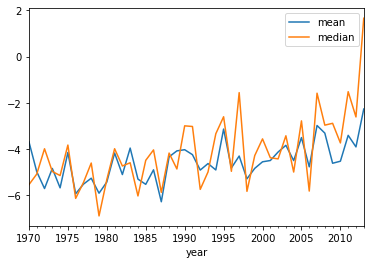

In [40]:
df_t_avg.xs('Russia')['AverageTemperature'].plot()

In [41]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [42]:
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [43]:
df_t_med.rename(columns={'median':'temperature'}, inplace=True)
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [44]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,26.3340,15.1515,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,26.8425,14.3965,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,27.0085,15.9725,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,27.0370,15.3350,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


<AxesSubplot:>

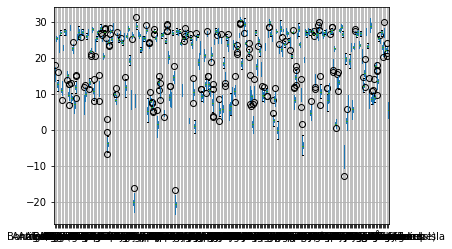

In [45]:
df_t_pivot.boxplot()

<AxesSubplot:>

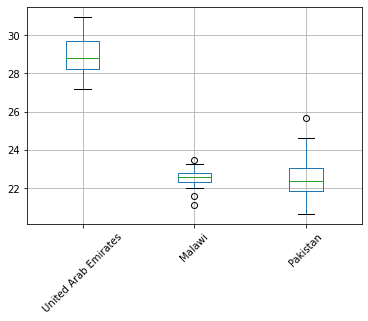

In [46]:
df_t_pivot.T.sample(3).T.boxplot(rot=45)

In [47]:
df_agri = pd.read_csv('db/API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv',header=2)
df_fore = pd.read_csv('db/API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv',header=2)
df_elec = pd.read_csv('db/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv',header=2)
df_co2e = pd.read_csv('db/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv',header=2)
df_popu = pd.read_csv('db/API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv',header=2)

In [48]:
df_popu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,1845300.0,NaN,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,NaN,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,NaN,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,NaN,NaN


In [49]:
range(1971,2015)
map(str,range(1971,2015))
cols = ['Country Name','Country Code'] + list(map(str,range(1971,2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [50]:
df_agri.loc[:,cols]

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
1,Afghanistan,AFG,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,...,379100.000000,379100.000000,379100.000000,379100.000000,379100.000000,379110.000000,379100.000000,379100.000000,379100.000000,379100.000000
2,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,...,575900.000000,575900.000000,576900.000000,576900.000000,582900.000000,583900.000000,589900.000000,589900.000000,591900.000000,591900.000000
3,Albania,ALB,12000.0,11740.0,11460.0,11220.0,10800.0,10750.0,11090.0,11140.0,...,10770.000000,11200.000000,11190.000000,11810.000000,12013.000488,12013.000488,12010.000000,12013.000488,11873.000488,11742.900391
4,Andorra,AND,250.0,250.0,240.0,240.0,240.0,230.0,230.0,230.0,...,217.999992,217.800007,207.700005,207.600002,207.700005,197.700005,197.700005,187.600002,188.099995,188.099995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,...,235230.000000,236270.000000,236270.000000,235170.000000,234520.000000,235790.000000,234520.000000,235500.000000,235460.000000,235460.000000
261,South Africa,ZAF,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,...,974830.000000,968880.000000,968900.000000,971080.000000,969880.000000,968910.000000,963740.000000,968410.000000,968410.000000,968410.000000
262,Zambia,ZMB,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,...,227620.000000,230480.000000,229840.000000,230870.000000,235860.000000,234360.000000,236360.000000,238360.000000,237360.000000,238360.000000


In [51]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':'agriculture'})

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.0
11613,South Africa,ZAF,2014,968410.0
11614,Zambia,ZMB,2014,238360.0


In [52]:
def fun_format(df, col = 'agriculture'):
  return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
      columns={'variable':'date',
              'Country Name':'Country',
              'Country Code':'name',
              'value':col})

In [53]:
df_agri = fun_format(df_agri, col = 'agriculture')
df_fore = fun_format(df_fore, col = 'forest')
df_elec = fun_format(df_elec, col = 'electricprod')
df_co2e = fun_format(df_co2e, col = 'co2')
df_popu = fun_format(df_popu, col = 'population')
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59440.0
1,Afghanistan,AFG,1971,11475445.0
2,Angola,AGO,1971,6040777.0
3,Albania,ALB,1971,2187853.0
4,Andorra,AND,1971,25559.0
...,...,...,...,...
11611,Kosovo,XKX,2014,1821800.0
11612,"Yemen, Rep.",YEM,2014,25823485.0
11613,South Africa,ZAF,2014,54545991.0
11614,Zambia,ZMB,2014,15399753.0


In [54]:
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [55]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  object 
 3   population  11501 non-null  float64
dtypes: float64(1), object(3)
memory usage: 363.1+ KB


In [57]:
df_popu['date'] = df_popu['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  float64
 3   population  11501 non-null  float64
dtypes: float64(2), object(2)
memory usage: 363.1+ KB


In [58]:
df_merge = pd.merge(df_t_med[['Country','temperature','date']],
                    df_popu, on = ['Country','date'], how = 'inner')

In [59]:
df_merge

,Country,temperature,date,name,population
0,Afghanistan,14.9340,1971,AFG,11475445.0
1,Afghanistan,13.8725,1972,AFG,11791215.0
2,Afghanistan,14.9130,1973,AFG,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412950.0
4,Afghanistan,13.5130,1975,AFG,12689160.0
...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0


In [60]:
df_merge = pd.merge(df_merge,
                    df_co2e,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_elec,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_agri,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_fore,
                    on = ['Country','name','date'],
                    how = 'inner')
df_merge

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,14.9340,1971,AFG,11475445.0,1895.839,NaN,380360.0,NaN
1,Afghanistan,13.8725,1972,AFG,11791215.0,1532.806,NaN,380460.0,NaN
2,Afghanistan,14.9130,1973,AFG,12108963.0,1639.149,NaN,380480.0,NaN
3,Afghanistan,13.6160,1974,AFG,12412950.0,1917.841,NaN,380480.0,NaN
4,Afghanistan,13.5130,1975,AFG,12689160.0,2126.860,NaN,380480.0,NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,5603.176,585.456912,163000.0,159510.000000
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,7777.707,606.644199,162000.0,156240.000000
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,9563.536,636.249337,164000.0,153115.996094
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,7792.375,608.762505,162000.0,149992.001953


In [61]:
df_climate = df_merge.dropna()

In [62]:
df_climate

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
62,Albania,13.4490,1990,ALB,3286542.0,5515.168,552.252185,11210.0,7887.999878
63,Albania,11.5885,1991,ALB,3266790.0,4286.723,418.453589,11270.0,7868.499756
64,Albania,13.5850,1992,ALB,3247039.0,2515.562,453.644074,11270.0,7849.000244
65,Albania,13.6500,1993,ALB,3227287.0,2335.879,536.363825,11260.0,7829.500122
66,Albania,13.2390,1994,ALB,3207536.0,1925.175,596.407959,11260.0,7810.000000
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,5603.176,585.456912,163000.0,159510.000000
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,7777.707,606.644199,162000.0,156240.000000
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,9563.536,636.249337,164000.0,153115.996094
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,7792.375,608.762505,162000.0,149992.001953


In [64]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [65]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,202,082.9
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

In [66]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [67]:
df_max_co2 = df_climate[df_climate['Country'].isin([ 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_max_co2

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
1266,Canada,-4.6,1990,CAN,"27,691,138.0","435,181.2","16,167.4","677,680.0","3,482,730.0"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","426,780.1","16,181.6","677,530.0","3,482,259.1"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","440,978.8","16,164.4","678,140.0","3,481,788.1"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","445,580.8","16,320.1","678,740.0","3,481,316.9"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","456,849.5","16,388.3","679,340.0","3,480,845.9"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","5,263,505.5","12,913.7","4,099,606.9","3,079,274.1"
7005,United States,10.2,2010,USA,"309,326,085.0","5,395,532.1","13,394.9","4,084,261.9","3,087,200.0"
7006,United States,9.5,2011,USA,"311,580,009.0","5,289,680.5","13,246.0","4,046,693.1","3,089,950.0"
7007,United States,9.9,2012,USA,"313,874,218.0","5,119,436.4","12,964.3","4,087,065.0","3,092,700.0"


In [68]:
df_max_co2.set_index('Country')

,temperature,date,name,population,co2,electricprod,agriculture,forest
Country,,,,,,,,
Canada,-4.6,1990,CAN,"27,691,138.0","435,181.2","16,167.4","677,680.0","3,482,730.0"
Canada,-4.2,1991,CAN,"28,037,420.0","426,780.1","16,181.6","677,530.0","3,482,259.1"
Canada,-5.0,1992,CAN,"28,371,264.0","440,978.8","16,164.4","678,140.0","3,481,788.1"
Canada,-4.0,1993,CAN,"28,684,764.0","445,580.8","16,320.1","678,740.0","3,481,316.9"
Canada,-3.4,1994,CAN,"29,000,663.0","456,849.5","16,388.3","679,340.0","3,480,845.9"
...,...,...,...,...,...,...,...,...
United States,8.4,2009,USA,"306,771,529.0","5,263,505.5","12,913.7","4,099,606.9","3,079,274.1"
United States,10.2,2010,USA,"309,326,085.0","5,395,532.1","13,394.9","4,084,261.9","3,087,200.0"
United States,9.5,2011,USA,"311,580,009.0","5,289,680.5","13,246.0","4,046,693.1","3,089,950.0"


<AxesSubplot:xlabel='population', ylabel='co2'>

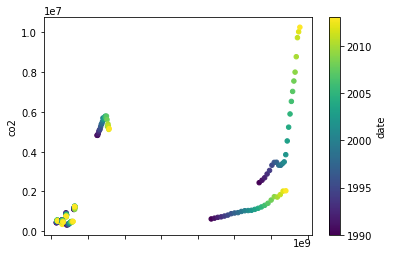

In [69]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap='viridis')

In [70]:
df_climate.corr()

,temperature,date,population,co2,electricprod,agriculture,forest
temperature,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.0,0.6,0.4
co2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
electricprod,-0.4,0.1,-0.0,0.2,1.0,0.1,0.2
agriculture,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


In [71]:
import seaborn as sns

<AxesSubplot:>

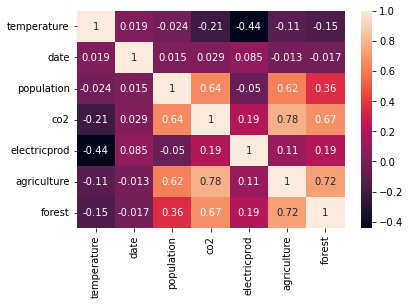

In [72]:
sns.heatmap(df_climate.corr(), annot=True)

In [73]:
df_med = df_climate.groupby('date').median()
df_med

,temperature,population,co2,electricprod,agriculture,forest
date,,,,,,
1990,22.7,"10,213,863.0","31,363.9","1,114.7","90,195.0","54,005.0"
1991,22.4,"10,346,663.5","27,343.0","1,072.5","91,870.0","60,307.5"
1992,19.9,"9,188,305.5","26,420.7","1,451.8","89,700.0","45,621.0"
1993,20.6,"9,951,683.5","28,267.1","1,520.3","89,890.0","44,579.0"
1994,20.7,"9,991,525.0","29,640.4","1,576.8","89,150.0","42,572.0"
1995,20.1,"10,026,176.0","29,090.3","1,578.3","81,080.0","41,640.0"
1996,20.2,"10,063,945.0","30,670.8","1,687.1","79,870.0","41,270.0"
1997,20.4,"10,108,977.0","30,623.1","1,762.4","80,120.0","41,270.0"
1998,21.5,"10,069,000.0","31,675.5","1,807.3","80,550.0","40,834.0"


<AxesSubplot:>

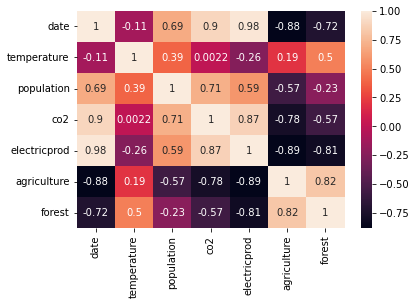

In [74]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

In [75]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='date', ylabel='date'>,
        <AxesSubplot:xlabel='temperature', ylabel='date'>,
        <AxesSubplot:xlabel='population', ylabel='date'>,
        <AxesSubplot:xlabel='co2', ylabel='date'>,
        <AxesSubplot:xlabel='electricprod', ylabel='date'>,
        <AxesSubplot:xlabel='agriculture', ylabel='date'>,
        <AxesSubplot:xlabel='forest', ylabel='date'>],
       [<AxesSubplot:xlabel='date', ylabel='temperature'>,
        <AxesSubplot:xlabel='temperature', ylabel='temperature'>,
        <AxesSubplot:xlabel='population', ylabel='temperature'>,
        <AxesSubplot:xlabel='co2', ylabel='temperature'>,
        <AxesSubplot:xlabel='electricprod', ylabel='temperature'>,
        <AxesSubplot:xlabel='agriculture', ylabel='temperature'>,
        <AxesSubplot:xlabel='forest', ylabel='temperature'>],
       [<AxesSubplot:xlabel='date', ylabel='population'>,
        <AxesSubplot:xlabel='temperature', ylabel='population'>,
        <AxesSubplot:xlabel='population'

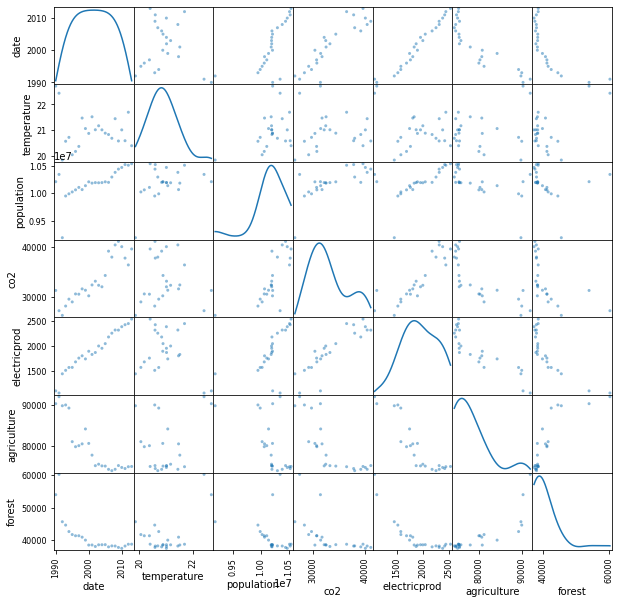

In [77]:
scatter_matrix(df_med.reset_index(),diagonal='kde', figsize = (10,10))

In [78]:
from pandas.plotting import parallel_coordinates

In [79]:
df_samerica = df_climate[
df_climate['Country'].isin(['Colombia',
     'Argentina',
     'Bolivia',
     'Mexico',
     'Peru',
     'Chile'])
][['Country',
 'temperature',
 'co2',
 'agriculture',
 'forest']]
 

In [81]:
df_samerica

,Country,temperature,co2,agriculture,forest
277,Argentina,15.4,"112,147.9","1,275,650.0","347,930.0"
278,Argentina,14.9,"117,098.3","1,276,600.0","344,997.0"
279,Argentina,14.9,"121,352.0","1,277,550.0","342,064.0"
280,Argentina,15.5,"117,927.1","1,278,500.0","339,131.0"
281,Argentina,15.0,"122,408.1","1,279,480.0","336,198.0"
...,...,...,...,...,...
5370,Peru,20.6,"51,704.7","239,460.0","749,544.0"
5371,Peru,20.5,"57,593.9","240,230.0","748,110.0"
5372,Peru,20.3,"49,632.8","241,040.0","746,434.0"
5373,Peru,20.6,"55,071.0","243,321.0","744,758.0"


<AxesSubplot:>

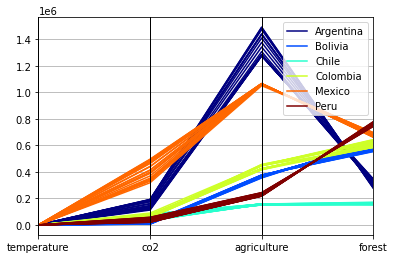

In [82]:
parallel_coordinates(df_samerica, 'Country', colormap = 'jet')

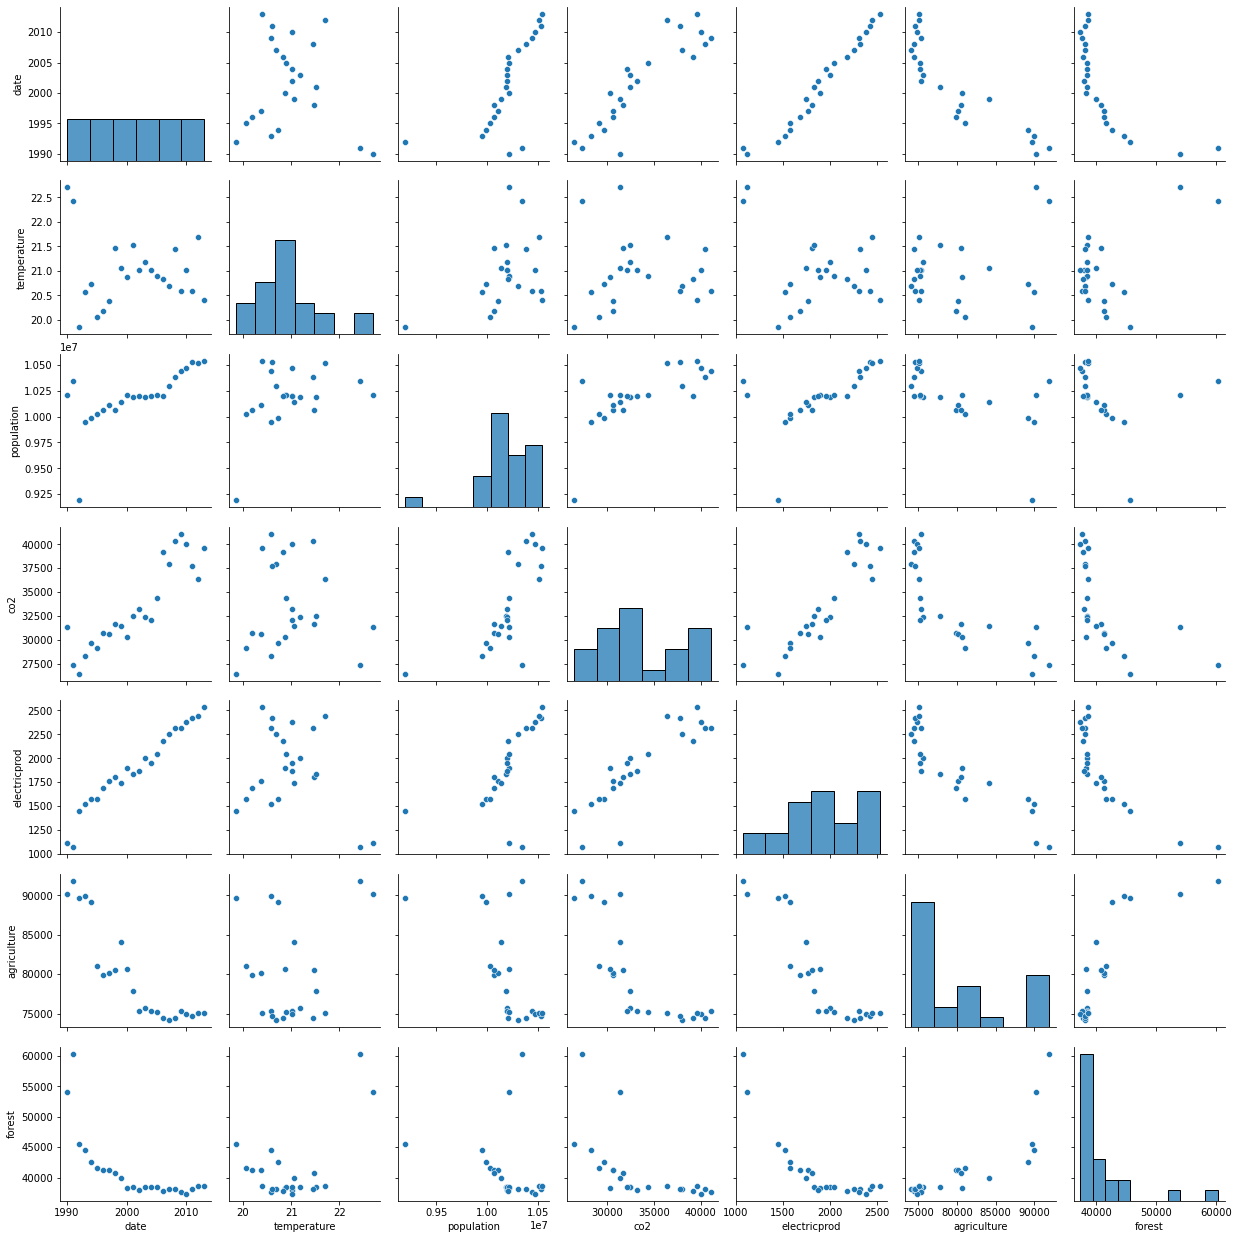

In [83]:
sns.pairplot(df_med.reset_index())

<AxesSubplot:>

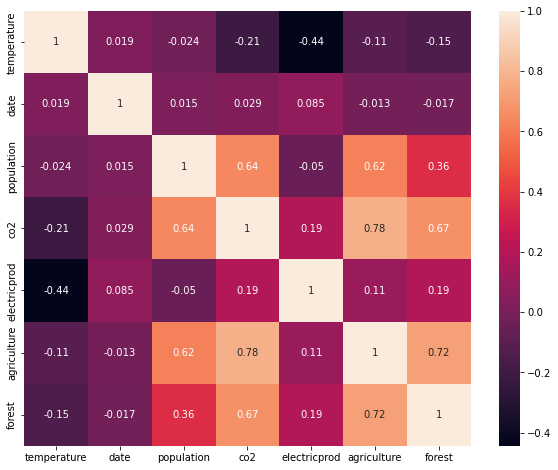

In [84]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_climate.corr(), annot=True, ax=ax)